# CSE474/574 - Programming Assignment 1

For grading, we will execute the submitted notebook as follows:

```shell
jupyter nbconvert --to python PA1Script.ipynb
python PA1Script.py
```

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
import math

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [2]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [3]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    w = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),y))
    return w

In [4]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    rmse = np.sqrt((np.dot(np.transpose((ytest-np.dot(Xtest,w))),(ytest-np.dot(Xtest,w))))/len(Xtest))
    return rmse

In [5]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [6]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [7]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    error = 0
    w = w.reshape(X.shape[1],1)
    w_t = np.transpose(w)
    for i in range(X.shape[0]):
        l = X[i].reshape(1,X.shape[1])
        xwi = np.dot(X[i],w)
        yy = y[i][0]
        error = error + ((yy - xwi)*(yy - xwi))
    error = error/2
    return error

In [8]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 
    w = w.reshape(X.shape[1],1)
    error_grad = np.ones((X.shape[1],))
    a = np.dot(np.dot(np.transpose(X),X),w)
    b = np.dot(np.transpose(X),y).reshape(X.shape[1],)
    for i in range(a.shape[0]):
        error_grad[i]= a[i]-b[i]
    
    return error_grad

In [9]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 48.07
Gradient Descent Linear Regression RMSE on test data - 54.76


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [10]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [11]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    ypred = np.zeros([Xtest.shape[0],1])
    xw = np.dot(Xtest,w)
    for i in range(Xtest.shape[0]):
        if xw[i][0]>=0:
            ypred[i][0]=1
        elif xw[i][0]<0:
            ypred[i][0]=-1
    return ypred

In [12]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    acc = 0
    n = 0
    yp = np.dot(Xtest,w)
    for i in range(ytest.shape[0]):
        if yp[i][0]>=0:
            if ytest[i][0]==1:
                n = n + 1
        elif yp[i][0]<0:
            if ytest[i][0]==-1:
                n = n + 1
    acc = (n/ytest.shape[0])*100
    return acc

In [13]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 84.00
Perceptron Accuracy on test data - 84.00


### Problem 4 - Logistic Regression Using Newton's Method

In [14]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [15]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    error = 0
    x_w = np.dot(X,w)
    sn = 0
    su = 0
    for sn in range(X.shape[0]):
        su = su + np.log(1+math.exp(-1*y[sn][0]*x_w[sn][0]))
    error = su/X.shape[0]
    return error


In [16]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #gradient = np.zeros((w.shape[0],))
    x_w1 = np.dot(X,w)
    sn1 = 0
    su1 = 0
    for sn1 in range(X.shape[0]):
        su1 = su1 + (y[sn1][0]*X[sn1]/(1+(math.exp(y[sn1][0]*x_w1[sn1][0]))))
      
    gradient = (-1*su1)/X.shape[0]
    return gradient

In [17]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    hessian = np.eye(X.shape[1])
    D = np.zeros(shape=(X.shape[0],X.shape[0]))
    x_t = np.transpose(X)
    x_x = np.dot(X,x_t)
    x_w2 = np.dot(X,w)
    sn2 = 0
    su2 = 0
    for sn2 in range(X.shape[0]):
        #su2 = su2 + (((x_x[sn2])*(math.exp(y[sn2][0]*x_w2[sn2][0])))/((1+(math.exp(y[sn2][0]*x_w2[sn2][0])))*(1+(math.exp(y[sn2][0]*x_w2[sn2][0])))))
        s_no = (1/(1+math.exp(-1*x_w2[sn2])))
        s_no = s_no * (1-s_no)
        D[sn2][sn2]=s_no
    hessian = np.dot(x_t,np.dot(D,X))/X.shape[0]
    return hessian

In [18]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 84.00
Logistic Regression Accuracy on test data - 86.00


### Problem 5 - Support Vector Machines Using Gradient Descent

In [19]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [20]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    
    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1],1])
    
    for t in range(T):
        a = np.random.randint(X.shape[0])
        y_w_t = y[a]*(np.dot(X[a],w))
        if (y_w_t[0])<1:
            m = y[a].reshape(1,1)
            n = X[a].reshape(1,X.shape[1])
            ss = np.transpose(np.dot(m,n))
            for k in range(w.shape[0]):
                w[k] = w[k] + (eta*ss[k])
    return w

In [21]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 81.00
SVM Accuracy on test data - 87.00


### Problem 6 - Plotting decision boundaries

In [22]:
print('Problem 6')
print('---------')

Problem 6
---------


In [23]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5, 1.0, 'SVM')

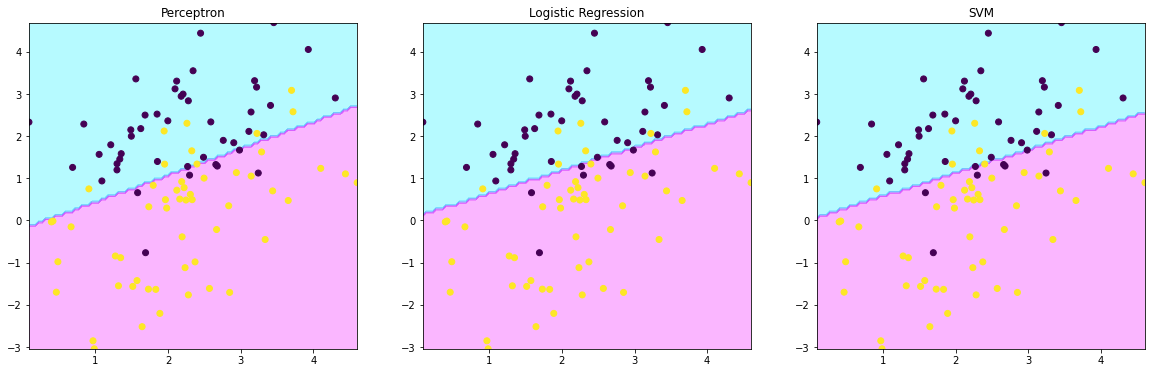

In [24]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
# PLUS,if needed, you can add at most extra 2 lines for each model.
w_perceptron = np.zeros((Xtrain_i.shape[1],1))
w_perceptron = np.transpose(np.array((minimize(regressionObjVal, w_perceptron, jac=regressionGradient, args=args,method='CG', options=opts)).x))[:,np.newaxis]

w_logistic = np.zeros((Xtrain_i.shape[1],1))
w_logistic = (np.transpose(np.array(minimize(logisticObjVal, w_logistic, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts).x))).reshape(len(w_logistic),1)

w_svm = np.zeros((Xtrain_i.shape[1],1))
w_svm = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
